## Import Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the data

In [44]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [46]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exploratory Data Analysis

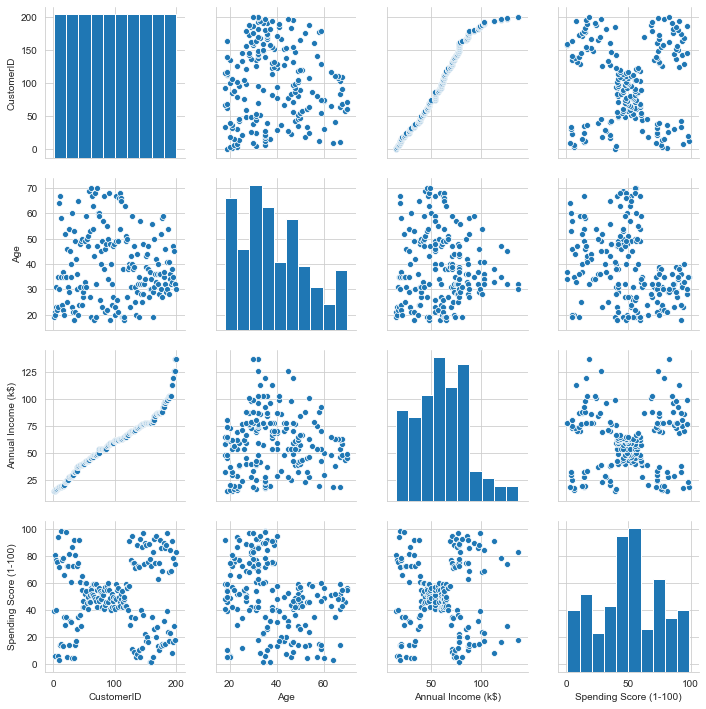

In [47]:
 sns.pairplot(df, palette='Dark2')

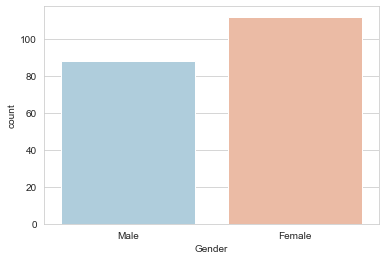

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Gender',data=df,palette='RdBu_r')

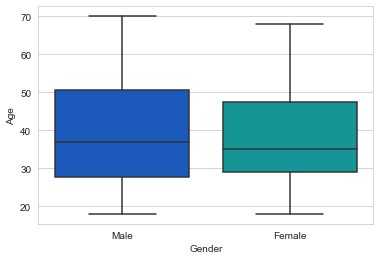

In [49]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender',y='Age',data=df,palette='winter')

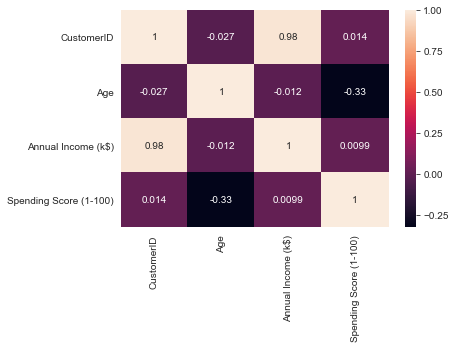

In [50]:
sns.heatmap(df.corr(), annot=True)

In [51]:
df=pd.get_dummies(df, drop_first=True)

In [52]:
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [53]:
x=df.iloc[:, :].values

In [54]:
from sklearn.cluster import KMeans

## Elbow Method: Determine the optimal k for k-means

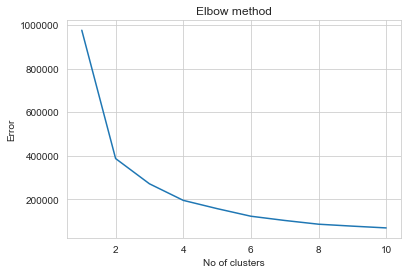

In [55]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

## Fit and Predict

In [56]:
km=KMeans(n_clusters=4)
y_km=km.fit_predict(x)
print(y_km)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [57]:
km.cluster_centers_

array([[162.        ,  32.69230769,  86.53846154,  82.12820513,
          0.46153846],
       [ 92.48484848,  43.87878788,  57.72727273,  49.25757576,
          0.43939394],
       [164.        ,  40.80555556,  87.91666667,  17.88888889,
          0.52777778],
       [ 30.06779661,  36.10169492,  29.86440678,  49.86440678,
          0.37288136]])

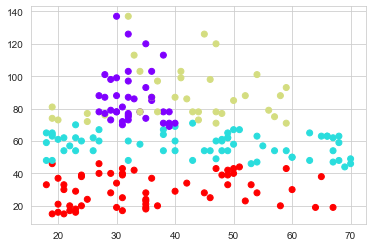

In [64]:
# Age Vs Annual Income
plt.scatter(x[:, 1], x[:, 2], c=y_km, cmap='rainbow')

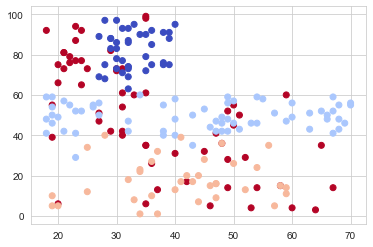

In [59]:
# Age Vs Spending Score (1-100)
plt.scatter(x[:, 1], x[:, 3], c=y_km, cmap='coolwarm')

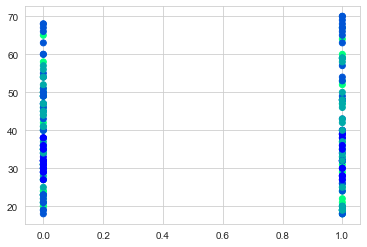

In [60]:
# Gender Vs Age
plt.scatter(x[:, 4], x[:, 1], c=y_km, cmap='winter')

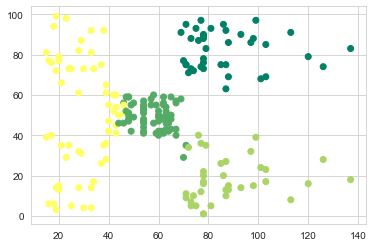

In [61]:
# Annual Income Vs Spending Score (1-100)
plt.scatter(x[:, 2], x[:, 3], c=y_km, cmap='summer')

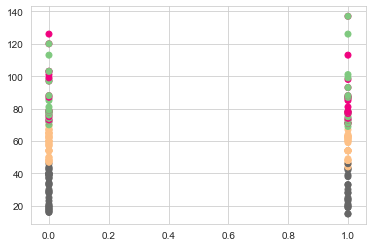

In [62]:
# Gender Vs Annual Income
plt.scatter(x[:, 4], x[:, 2], c=y_km, cmap='Accent')

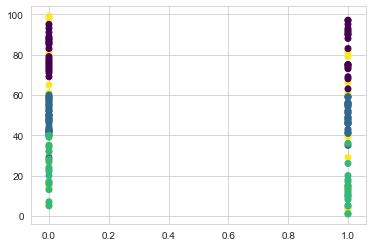

In [63]:
# Gender Vs Spending Score (1-100)
plt.scatter(x[:, 4], x[:, 3], c=y_km, cmap='viridis')